In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
festivales_bcn_21 = pd.read_pickle("./data/festivales_bcn_21_procesado.pkl")

In [101]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [102]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [103]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [104]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [105]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [106]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [107]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [108]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [109]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [110]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [111]:
festivales_bcn_21.describe().loc["mean"]

Edicio           17.666667
Asistentes    22991.638298
Name: mean, dtype: float64

In [112]:
festivales_bcn_21.describe().loc["50%"]

Edicio           16.0
Asistentes    11199.0
Name: 50%, dtype: float64

In [113]:
festivales_bcn_21.describe().loc["max"]

Edicio            53.0
Asistentes    221000.0
Name: max, dtype: float64

In [114]:
festivales_bcn_21.describe().loc["min"]

Edicio          2.0
Asistentes    780.0
Name: min, dtype: float64

In [115]:
festivales_bcn_21[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Noviembre
Estacion,Otoño
Entrada,De Pago


Comentarios <br>
La mediana de ediciones, situada en 16, está en este caso muy cerca de la media, en 17.7 <br>
Mas diferencia se nota en la cantidad de asistentes, con una mediana de unas 11.000 personas
Las modas son idénticas a las de 2022: el festival típico de Barcelona parecería ser uno de música organizado por una entidad privada, que  cobra entrada, y que tiene lugar en pleno otoño.

Frecuencias relativa y absoluta

In [116]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts())
    print("\n")

Ambit
Música                         14
Audiovisuals                   11
Multidisciplinaris i altres     8
Arts visuals                    5
Arts escèniques                 5
Lletres                         4
Name: count, dtype: int64


Titularidad
Privada    36
Pública    10
Mixta       1
Name: count, dtype: int64


Mes
Noviembre     11
Octubre        8
Enero          6
Junio          5
Mayo           4
Marzo          3
Septiembre     3
Julio          3
Abril          2
Diciembre      1
Agosto         1
Name: count, dtype: int64


Estacion
Otoño        22
Primavera    10
Invierno      9
Verano        6
Name: count, dtype: int64


Entrada
De Pago    32
Gratis     12
Mixta       3
Name: count, dtype: int64




In [118]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts()/len(festivales_bcn_21)*100)
    print("\n")

Ambit
Música                         29.787234
Audiovisuals                   23.404255
Multidisciplinaris i altres    17.021277
Arts visuals                   10.638298
Arts escèniques                10.638298
Lletres                         8.510638
Name: count, dtype: float64


Titularidad
Privada    76.595745
Pública    21.276596
Mixta       2.127660
Name: count, dtype: float64


Mes
Noviembre     23.404255
Octubre       17.021277
Enero         12.765957
Junio         10.638298
Mayo           8.510638
Marzo          6.382979
Septiembre     6.382979
Julio          6.382979
Abril          4.255319
Diciembre      2.127660
Agosto         2.127660
Name: count, dtype: float64


Estacion
Otoño        46.808511
Primavera    21.276596
Invierno     19.148936
Verano       12.765957
Name: count, dtype: float64


Entrada
De Pago    68.085106
Gratis     25.531915
Mixta       6.382979
Name: count, dtype: float64




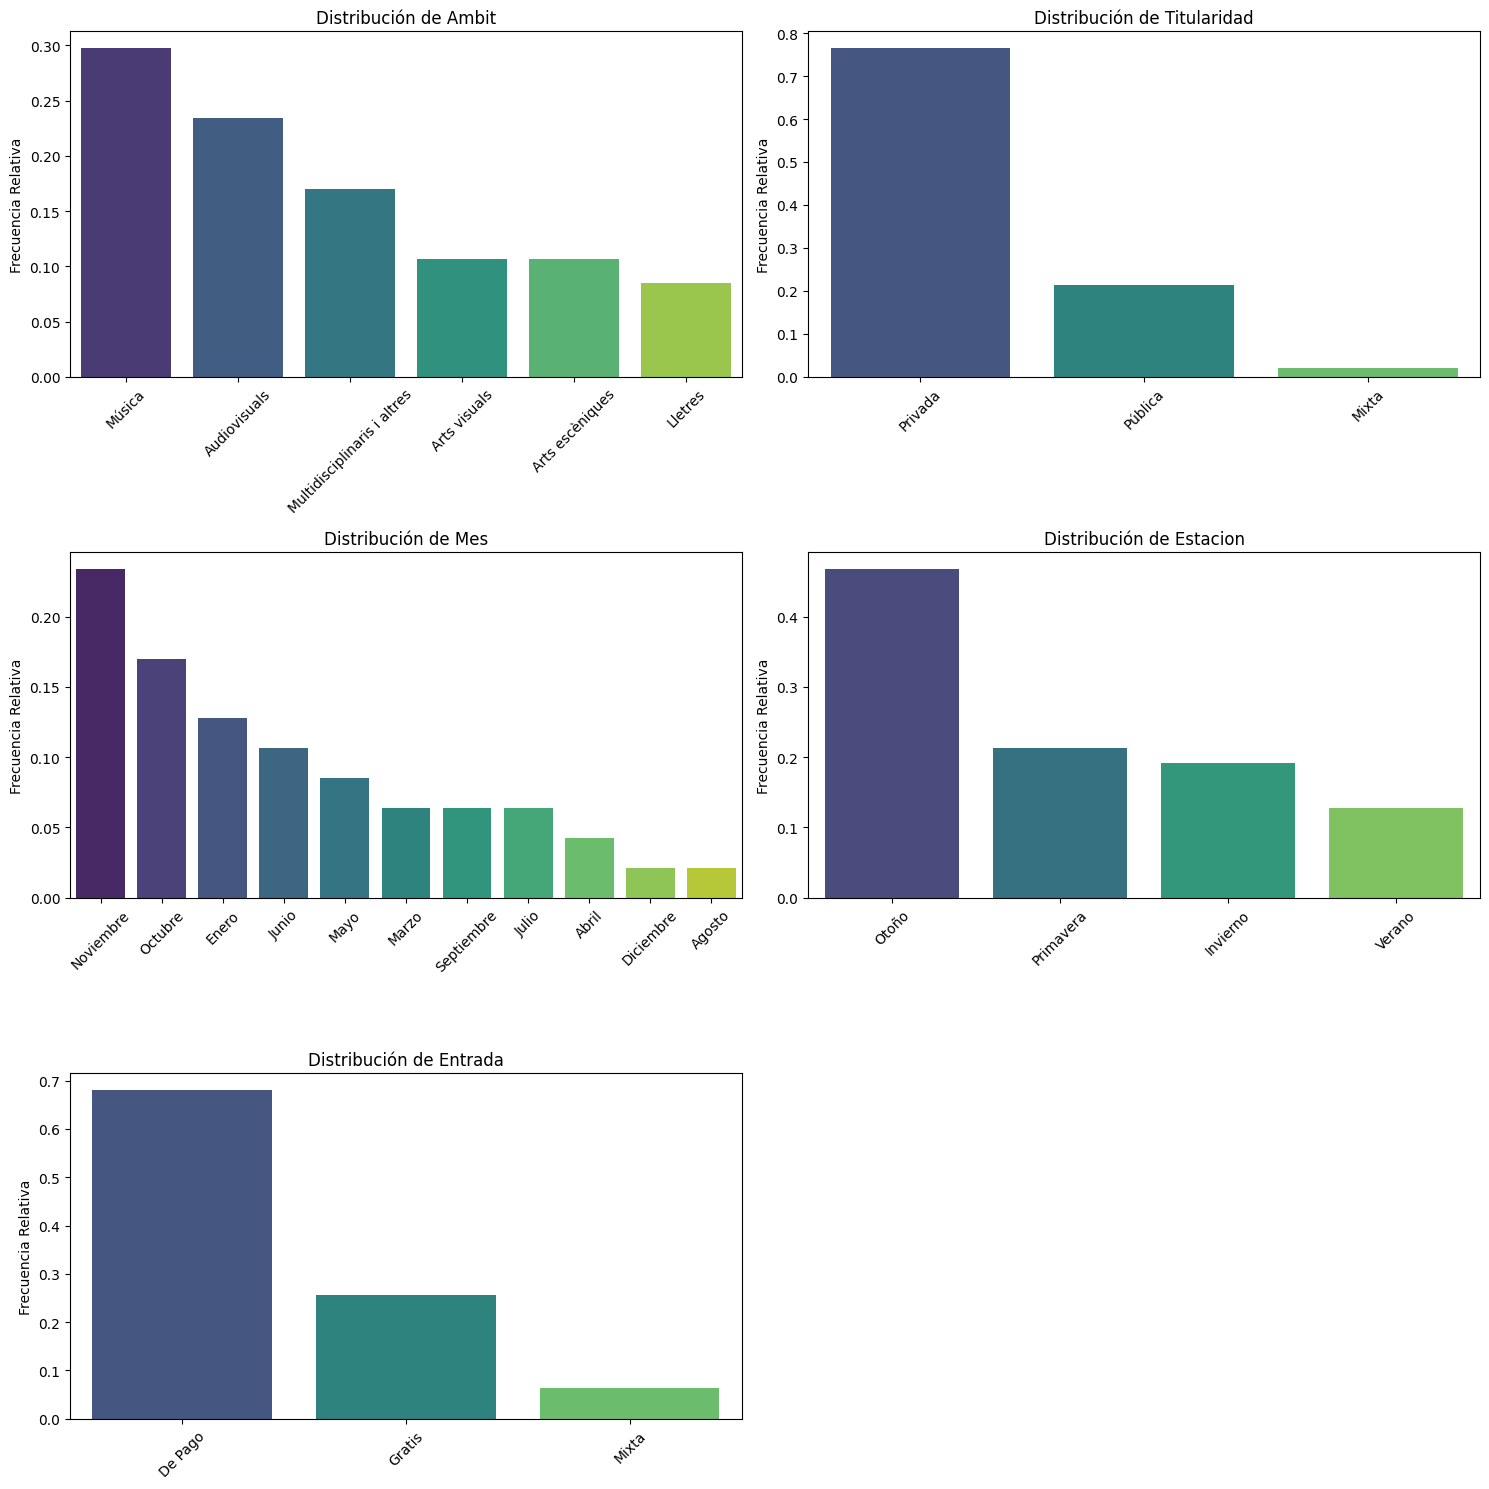

In [134]:
pinta_distribucion_categoricas(festivales_bcn_21, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado casi triplica las del sector público, y los festivales de pago más que duplican los gratuitos.Esto último tiene similitudes con los datos de 2019.<br>
En agosto y diciembre casi no hay festivales, sí antes y después, que son los 2 momentos con picos más altos, pero con una fuerte caída en general en invierno, a excepción de enero. Y el contraste entre otoño, vs primavera y verano es muy marcado. Diciembre cae mucho, pero no desaparece.<br>
La música es sin duda la protagonista de los festivales, con los audiovisuales en un segundo lugar.

Comentarios <br>


Medidas de posición

In [119]:
festivales_bcn_21.describe()

,Edicio,Asistentes
count,45.000000,47.000000
mean,17.666667,22991.638298
std,11.133488,37575.216223
min,2.000000,780.000000
25%,10.000000,5050.000000
50%,16.000000,11199.000000
75%,25.000000,19838.500000
max,53.000000,221000.000000


In [120]:
get_IQR(festivales_bcn_21,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

15.0

In [121]:
print(festivales_bcn_21["Edicio"].quantile(0.5), "\n",
    festivales_bcn_21["Edicio"].quantile(0.9), "\n",
    festivales_bcn_21["Edicio"].quantile(0.95), "\n",
    festivales_bcn_21["Edicio"].max())

16.0 
 30.200000000000003 
 33.599999999999994 
 53.0


In [122]:
get_IQR(festivales_bcn_21,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

14788.5

In [123]:
print(festivales_bcn_21["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_21["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_21["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_21["Asistentes"].max())

11199.0 
 48405.19999999999 
 85976.89999999983 
 221000.0


Comentarios: <br>
Alta dispersión en el número de asistentes, en el que la mediana está en 11.000, el primer 90% en 48 mil, que ya es 4 veces más, el último segmento pega un salto del doble en torno a los 86 mil, y el máximo casi lo triplica con 220 mil. El máximo es unas 20 veces la mediana.

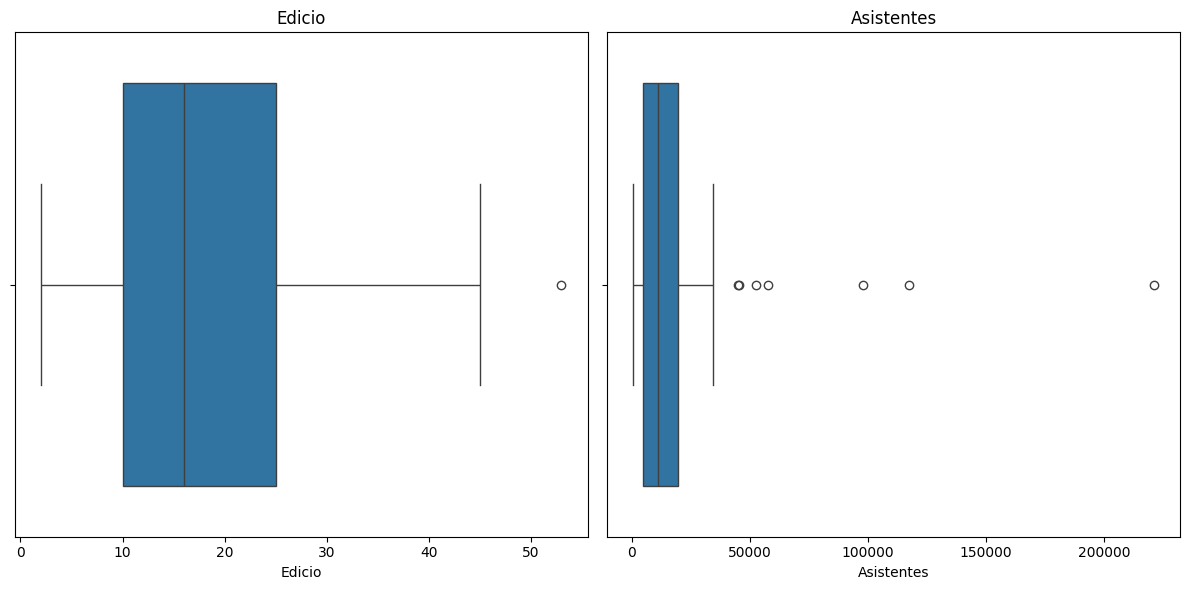

In [125]:
plot_multiple_boxplots(festivales_bcn_21, columnas_numericas_fests)

Comentarios <br>
Gracias a los boxplots podemos observar como la media está bastante centrada, y además hay bastantes outliers en las cifras de asistentes.

In [126]:
plot_boxplot_grouped(festivales_bcn_21, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [127]:
festivales_bcn_21.describe().loc[["std", "mean"]].T

,std,mean
Edicio,11.133488,17.666667
Asistentes,37575.216223,22991.638298


In [128]:
variabilidad(festivales_bcn_21)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,11.133488,17.666667,0.630197
Asistentes,37575.216223,22991.638298,1.634299


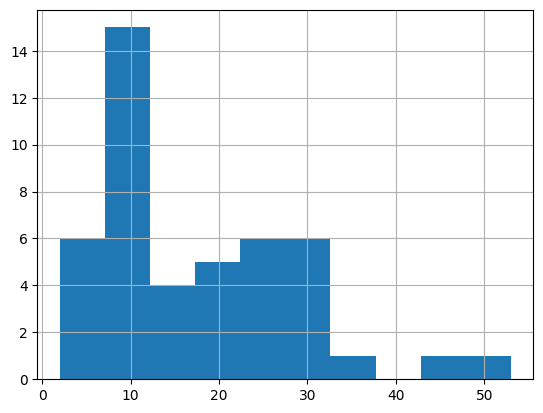

In [129]:
festivales_bcn_21["Edicio"].hist();

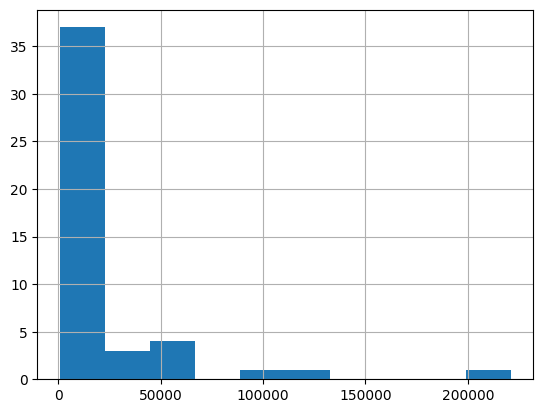

In [130]:
festivales_bcn_21["Asistentes"].hist();

Distribución

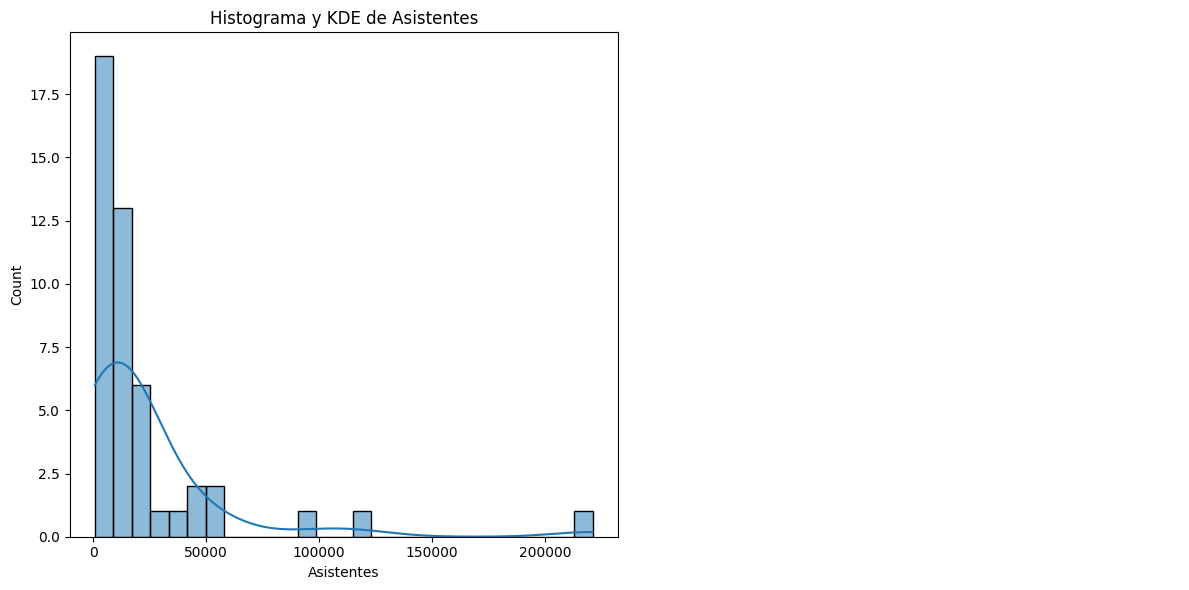

In [131]:
plot_histo_den(festivales_bcn_21, ["Asistentes"])

Anomalías outliers

(2,)


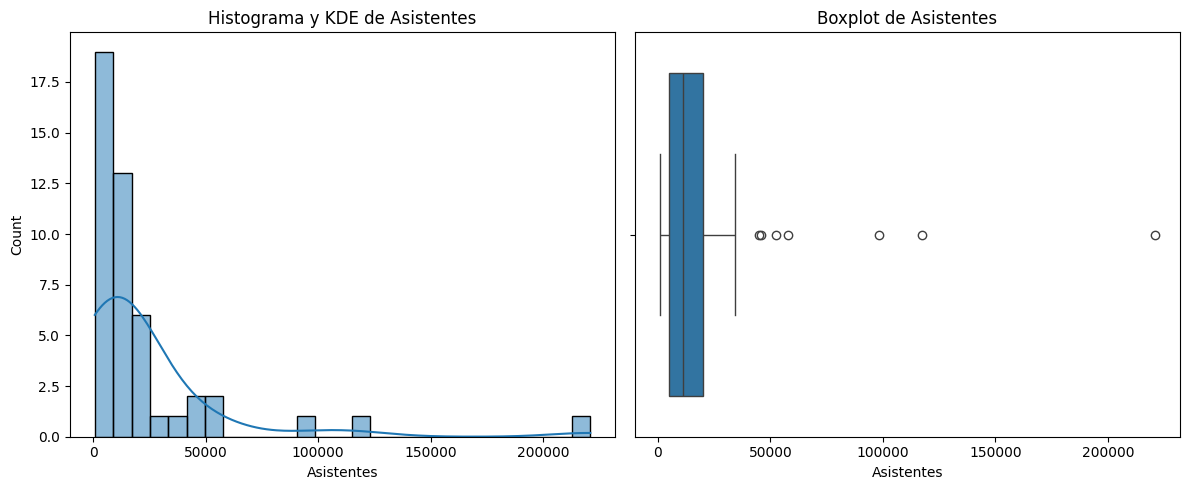

In [132]:
plot_combined_graphs(festivales_bcn_21, ["Asistentes"])

In [136]:
festivales_bcn_21 = festivales_bcn_21.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_21.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 5 - 50.00%
Gratis: 4 - 40.00%
Mixta: 1 - 10.00%


In [137]:
festivales_bcn_21 = festivales_bcn_21.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_21.head(10)  
tipo_entradas_top_festivales = primeros_10['Ambit'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

Audiovisuals: 3 - 30.00%
Multidisciplinaris i altres: 2 - 20.00%
Arts escèniques: 2 - 20.00%
Música: 2 - 20.00%
Arts visuals: 1 - 10.00%


In [135]:
festivales_bcn_21

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
8,Multidisciplinaris i altres,2.0,Barcelona Festival de Nadal,Pública,Diciembre,Otoño,221000.0,Gratis
34,Multidisciplinaris i altres,10.0,Llum BCN,Pública,Noviembre,Otoño,117200.0,Gratis
28,Arts escèniques,45.0,Grec Festival de Barcelona,Pública,Junio,Verano,98024.0,Mixta
3,Audiovisuals,9.0,Asian Film Festival,Privada,Octubre,Otoño,57867.0,De Pago
36,Arts escèniques,12.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Otoño,52568.0,Gratis
21,Música,11.0,Festival Cruïlla,Privada,Julio,Verano,45630.0,De Pago
29,Música,32.0,Guitar Bcn,Privada,Enero,Invierno,45000.0,De Pago
5,Arts visuals,16.0,Barcelona Design Week City Festival,Privada,Octubre,Otoño,34300.0,Gratis
43,Audiovisuals,19.0,Sala Montjuïc,Privada,Julio,Verano,28000.0,De Pago
25,Audiovisuals,19.0,Festival In-Edit,Privada,Octubre,Otoño,24652.0,De Pago
